# Обработка на податоците за прв квартал

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [ ]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gdelt = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset1_cleaned.csv')

In [ ]:
gdelt

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1029155021,203,-10.0,-2.275449,US,https://www.theguardian.com/commentisfree/2022...
1,1029216530,144,-7.5,-2.345416,US,https://wusfnews.wusf.usf.edu/weather/2022-02-...
2,1029161417,203,-10.0,1.091703,US,https://news.yahoo.com/word-smokies-african-am...
3,1029134955,144,-7.5,-1.403888,US,https://www.lajollalight.com/news/story/2022-0...
4,1029214924,202,-10.0,-0.436047,US,https://bwog.com/2022/02/beyond-batman-and-bla...
...,...,...,...,...,...,...
88380,1024760983,195,-10.0,2.083333,US,http://www.msn.com/en-nz/tv/celebrity/christin...
88381,1024746782,195,-10.0,-6.766917,US,https://www.middleeaststar.com/news/272226270/...
88382,1024815229,195,-10.0,-1.805054,US,https://eurasiantimes.com/china-yj-12-anti-shi...
88383,1024755061,195,-10.0,-4.697592,PK,http://idrw.org/time-to-phase-out-cheetah-heli...


In [ ]:
imf1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_US.csv')
imf2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_PK.csv')

In [ ]:
gdelt1 = gdelt[gdelt["ActionGeo_CountryCode"] == "US"]["AvgTone"]
gdelt2 = gdelt[gdelt["ActionGeo_CountryCode"] == "PK"]["AvgTone"]

In [ ]:
gdelt2.head(10)

,AvgTone
18,-7.838480
28,-4.681195
30,-9.937888
31,-2.968098
54,-4.954955
55,-9.686610
64,-3.720930
70,-5.792683
72,-5.172414
112,-8.060914


In [ ]:
imfUS = imf1.drop(columns=['Country code'])
imfPK = imf2.drop(columns=['Country code'])

In [ ]:
gdelt1 = gdelt1.dropna()
imfUS = imfUS.dropna()
gdelt2 = gdelt2.dropna()
imfPK = imfPK.dropna()

In [ ]:
gdelt1.reset_index(drop=True, inplace=True)
gdelt2.reset_index(drop=True, inplace=True)

In [ ]:
df_transposed = imfUS.T
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:].reset_index(drop=True)

In [ ]:
df_transposed1 = imfPK.T
df_transposed1.columns = df_transposed1.iloc[0]
df_transposed1 = df_transposed1[1:].reset_index(drop=True)

In [ ]:
df_transposed.columns

Index(['Current account', 'Goods and services', 'Credit', 'Debit', 'Goods',
       'Credit', 'General merchandise: export',
       'Net exports of goods under merchanting', 'Non-monetary gold: export',
       'Debit',
       ...
       'Yen', 'Other currencies', 'Unallocated', 'Of which one year or less',
       'Domestic currency', 'Foreign currency', 'Euro', 'Yen',
       'Other currencies', 'Unallocated'],
      dtype='object', name='Indicator', length=427)

In [ ]:
important_columns = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]

df_transposed = df_transposed[important_columns]
df_transposed = df_transposed.loc[:, ~df_transposed.columns.duplicated()]

important_columns1 = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]
df_transposed1 = df_transposed1[important_columns1]
df_transposed1 = df_transposed1.loc[:, ~df_transposed1.columns.duplicated()]


df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_merged1 = pd.merge(gdelt1, df_transposed, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2 = pd.merge(gdelt2, df_transposed1, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2.head()

,AvgTone,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,-7.838480,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,-4.681195,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,-9.937888,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,-2.968098,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,-4.954955,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


### Приказ на Heatmap

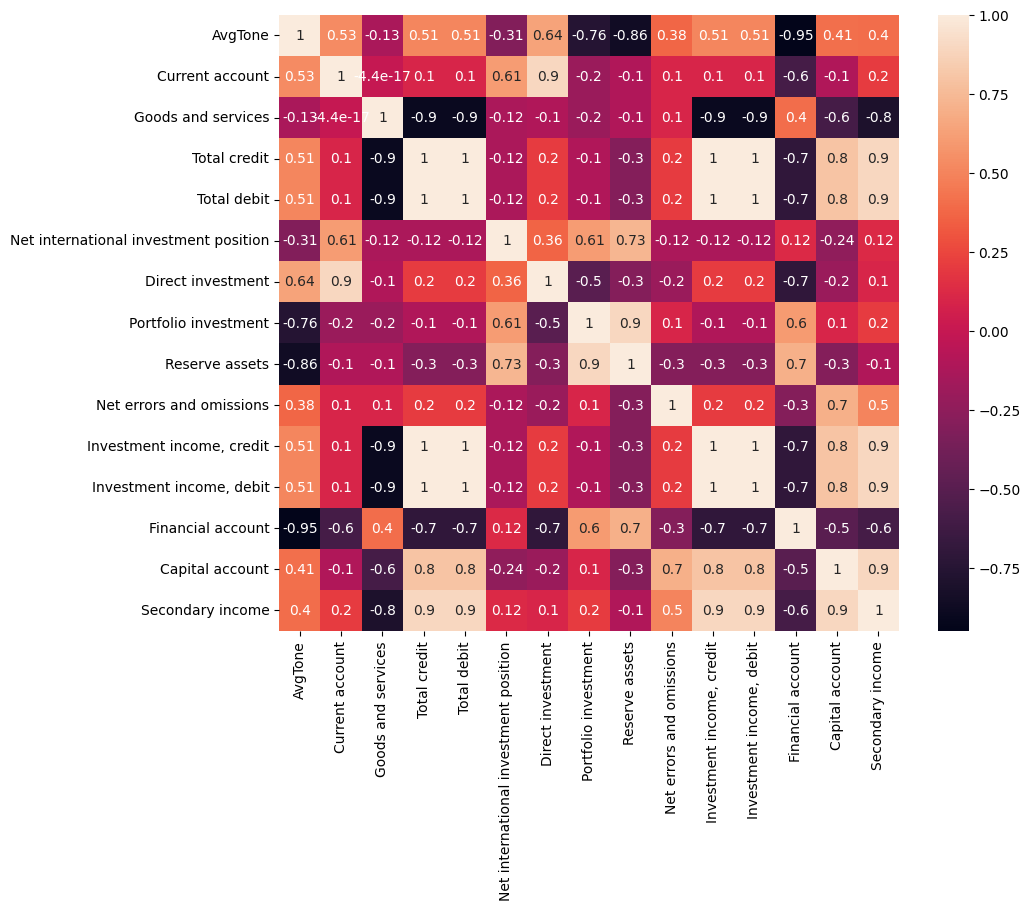

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df_merged1.columns:
    if df_merged1[column].dtype == 'object':
        df_merged1[column] = le.fit_transform(df_merged1[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged1.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

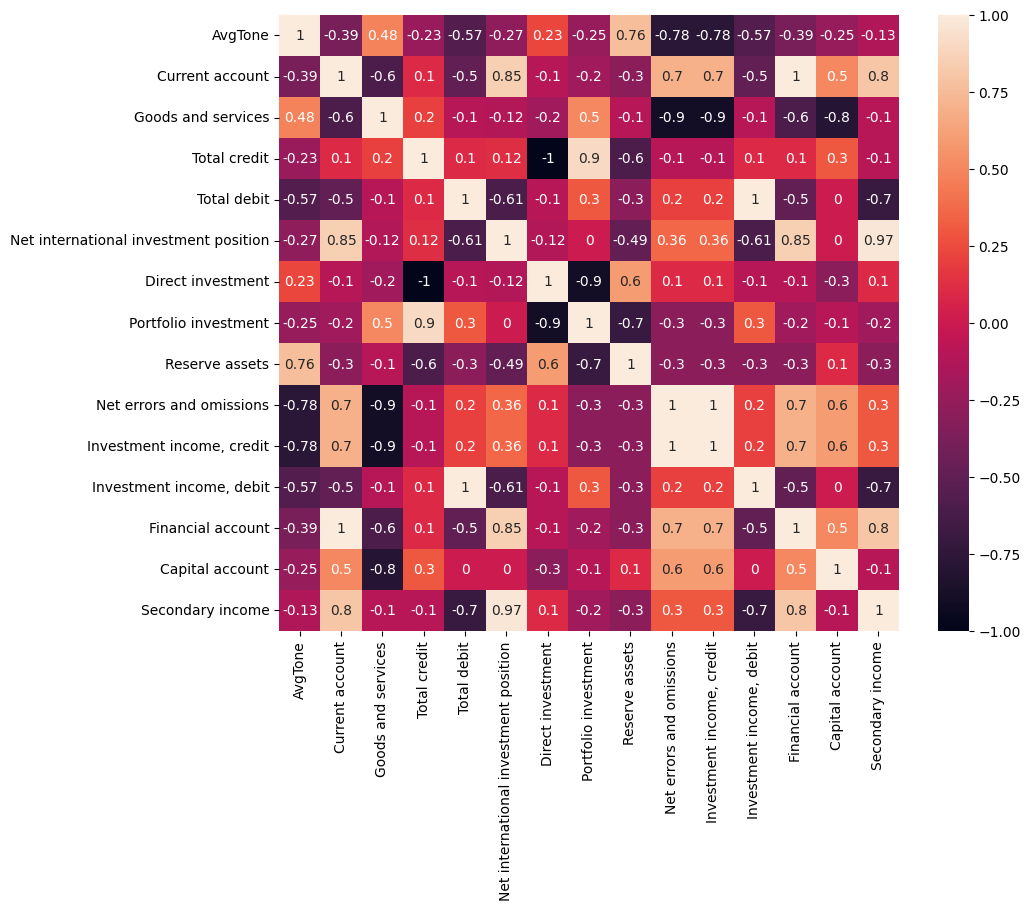

<Figure size 640x480 with 0 Axes>

In [ ]:
le = LabelEncoder()

for column in df_merged2.columns:
    if df_merged2[column].dtype == 'object':
        df_merged2[column] = le.fit_transform(df_merged2[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged2.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

### Pairplot (Scatterplot Matrix) за индивидуални релации

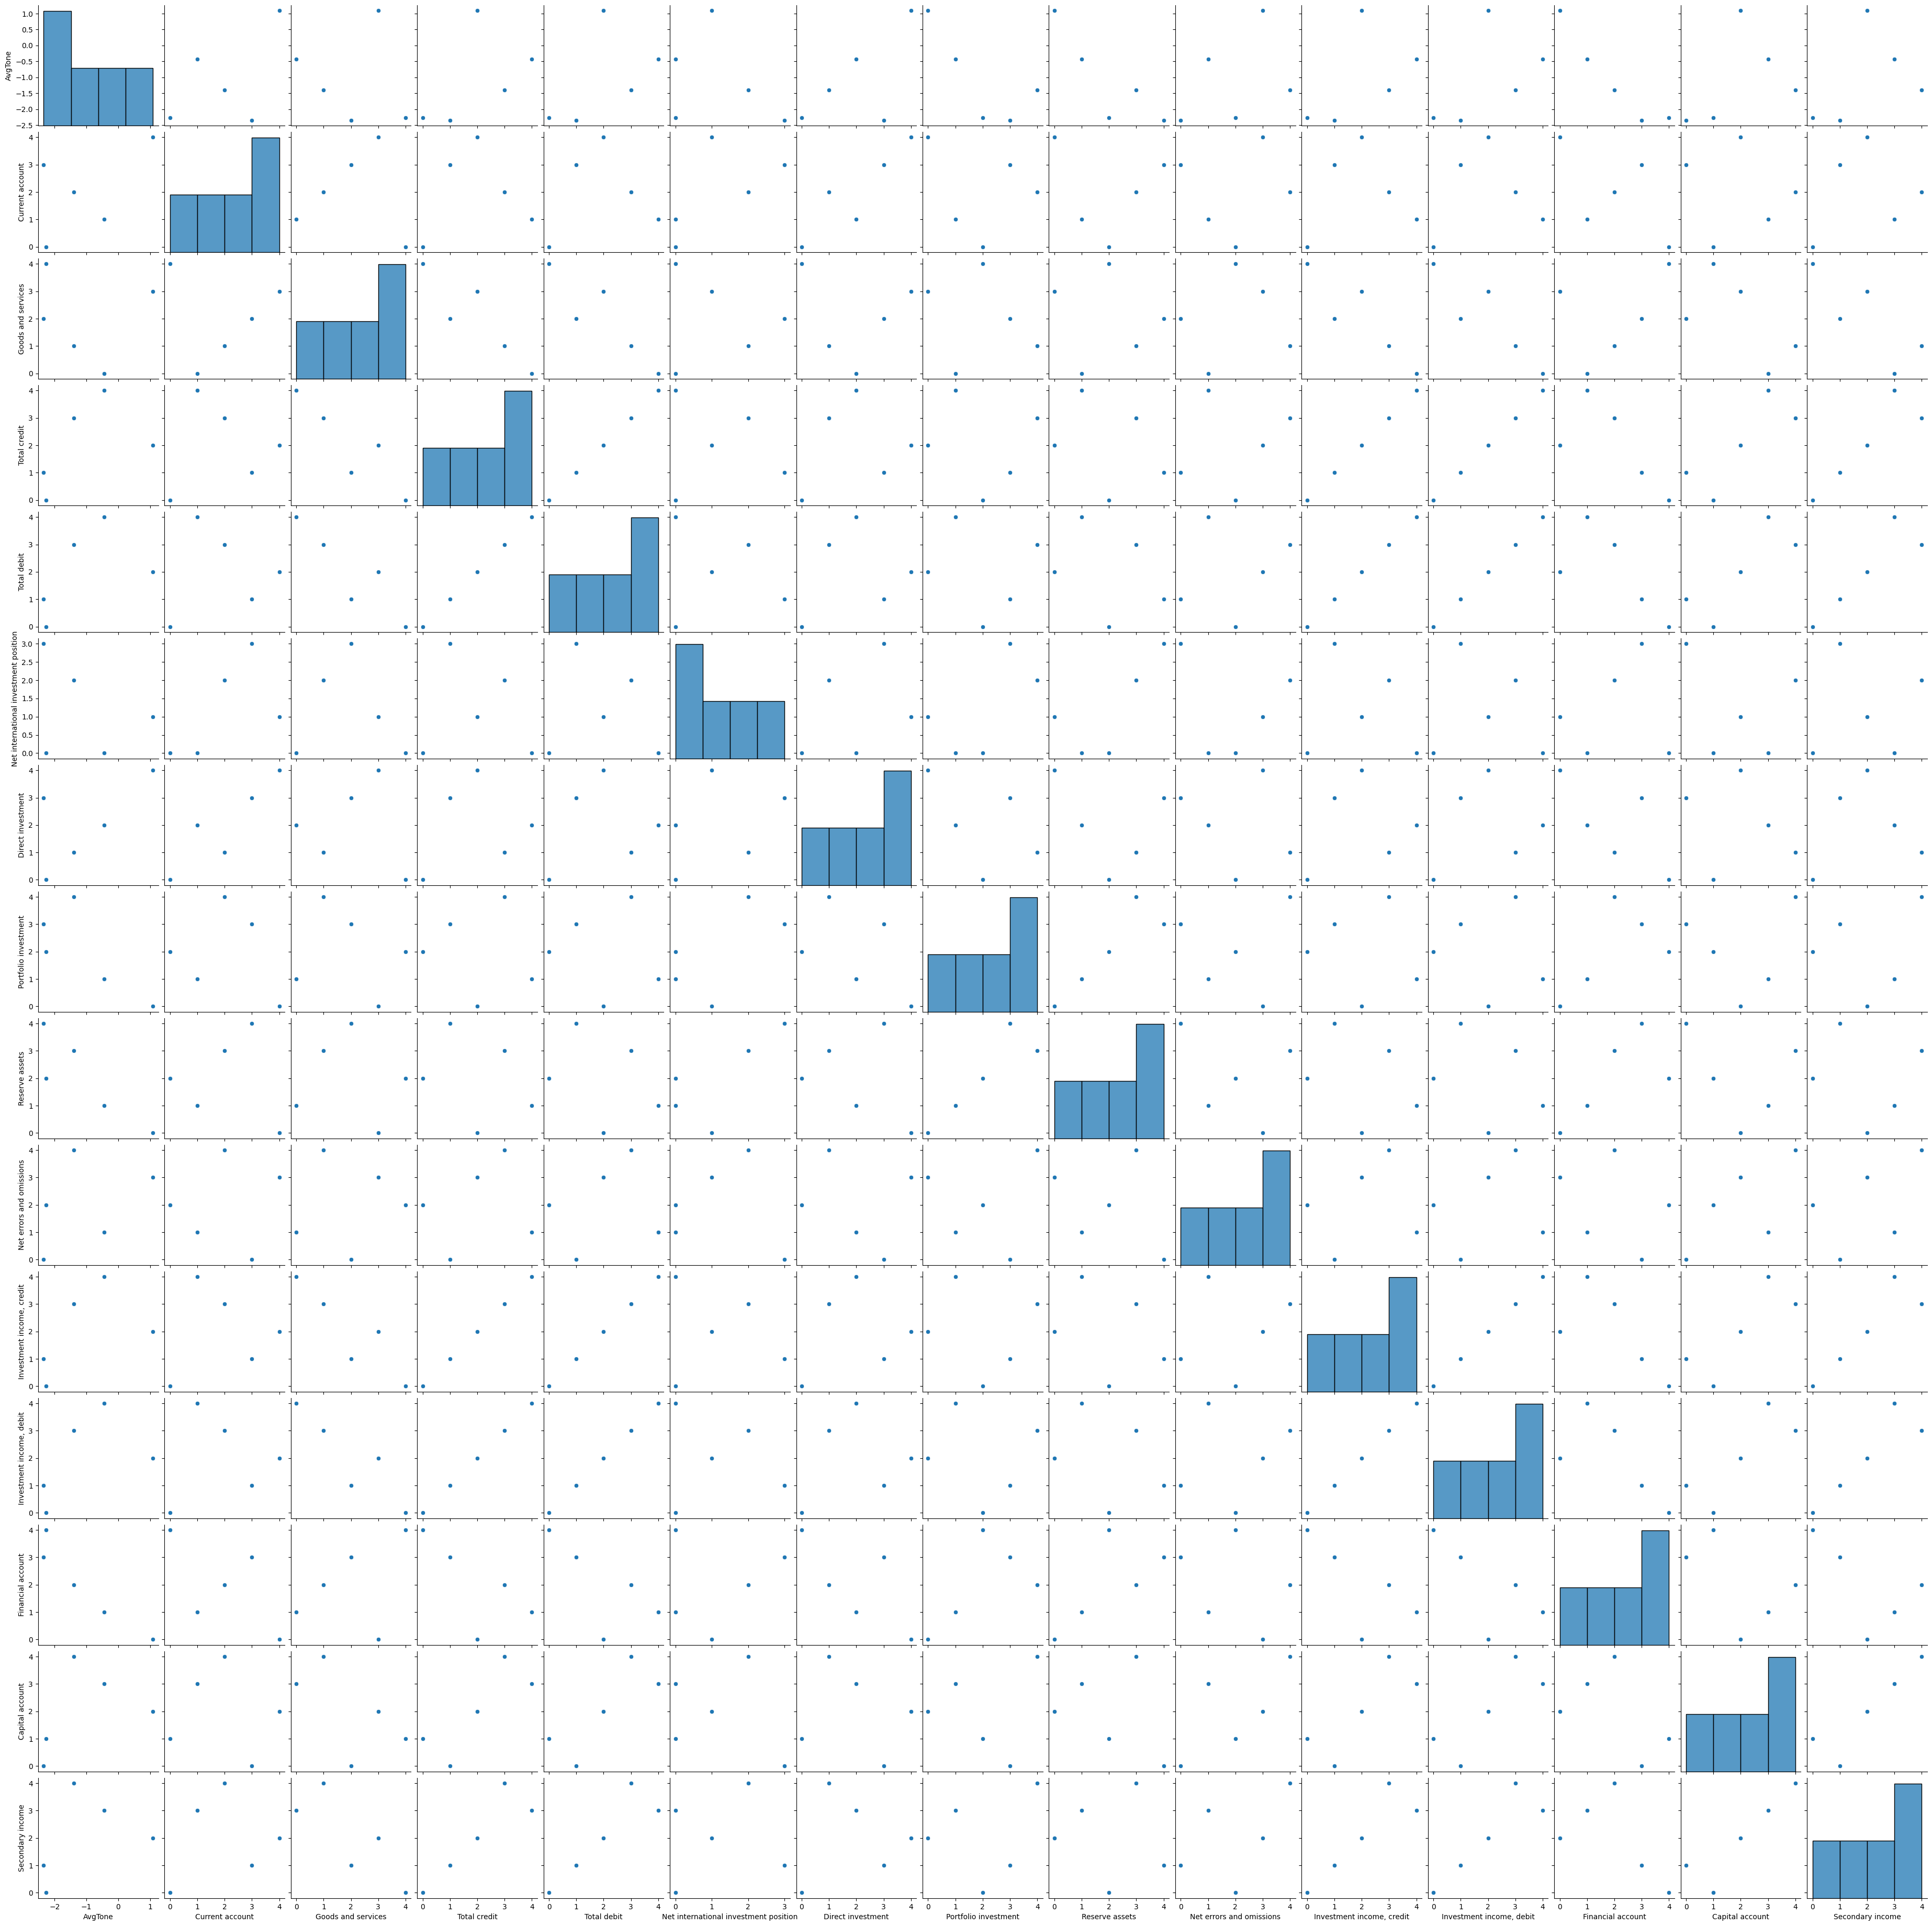

In [ ]:
sns.pairplot(df_merged1)
plt.show()

### Correlogram (Clustermap) за групирање на корелации

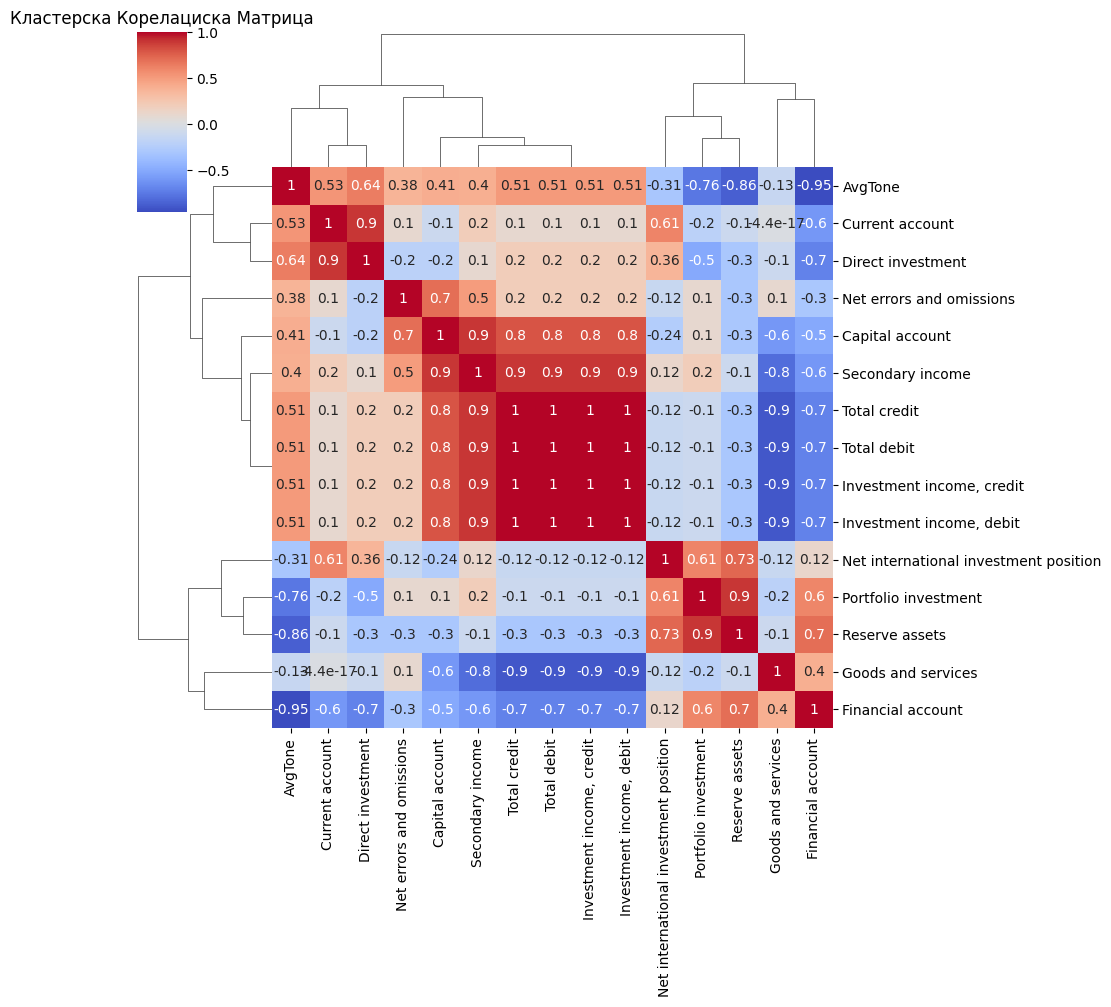

In [ ]:
sns.clustermap(df_merged1.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

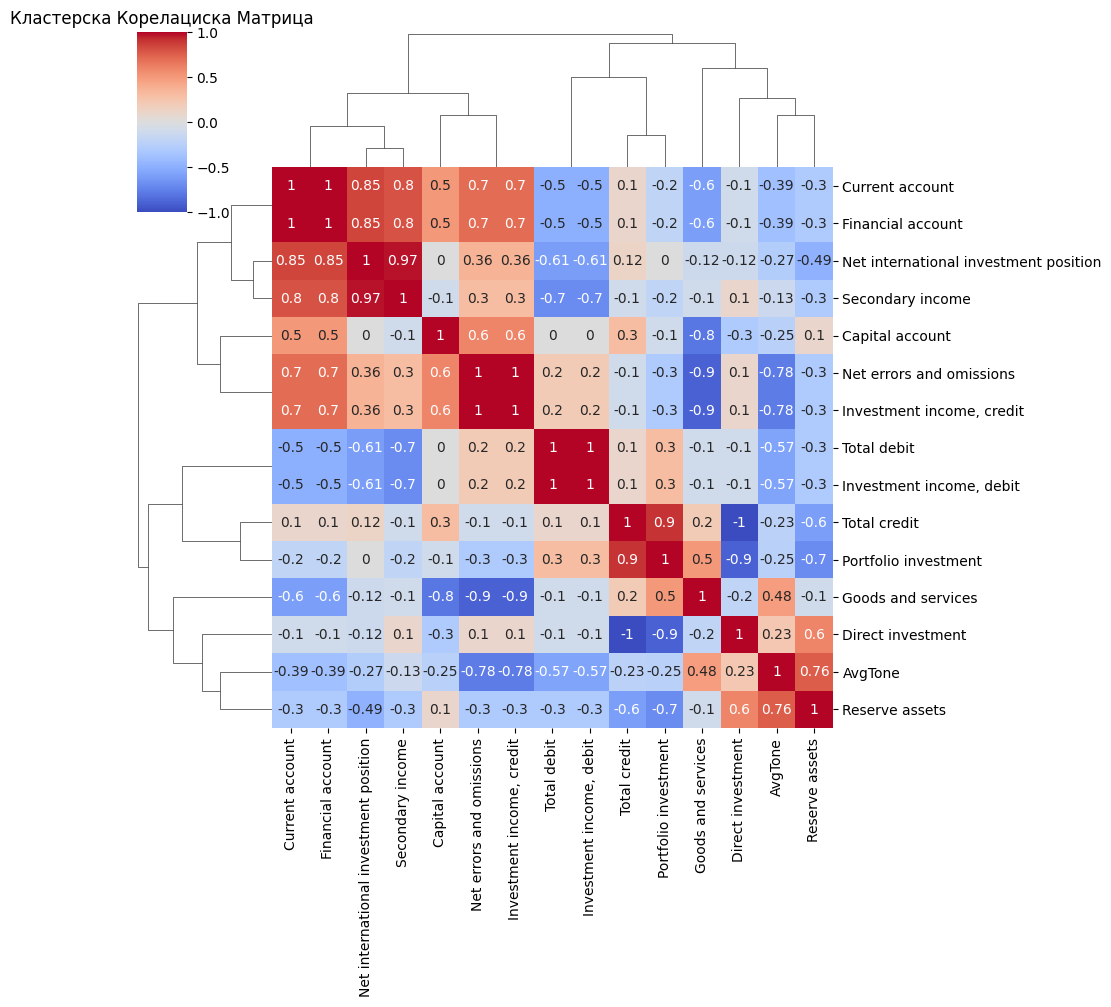

In [ ]:
sns.clustermap(df_merged2.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

### Приказ на Бар график

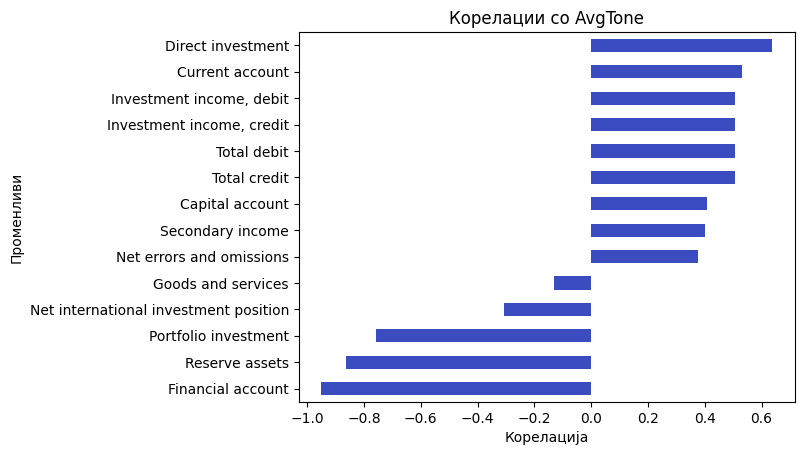

In [ ]:
corrs = df_merged1.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()

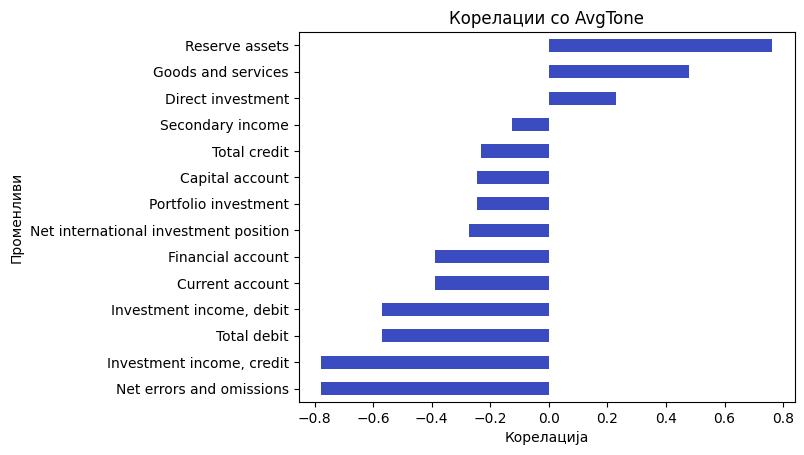

In [ ]:
corrs = df_merged2.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()

### Приказ на spearman корелација и kendall корелација

In [ ]:
spearman_corr = df_merged1.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged1.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000         0.300000   
Current account                        0.300000         1.000000   
Goods and services                    -0.200000         0.000000   
Total credit                           0.600000         0.100000   
Total debit                            0.600000         0.100000   
Net international investment position -0.410391         0.666886   
Direct investment                      0.400000         0.900000   
Portfolio investment                  -0.700000        -0.200000   
Reserve assets                        -0.900000        -0.100000   
Net errors and omissions               0.500000         0.100000   
Investment income, credit              0.600000         0.100000   
Investment income, debit               0.600000         0.100000   
Financial account                     -0.900000        -0.600000   
Capital account          

In [ ]:
spearman_corr = df_merged2.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged2.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000        -0.200000   
Current account                       -0.200000         1.000000   
Goods and services                     0.400000        -0.600000   
Total credit                          -0.100000         0.100000   
Total debit                           -0.700000        -0.500000   
Net international investment position -0.051299         0.872082   
Direct investment                      0.100000        -0.100000   
Portfolio investment                  -0.200000        -0.200000   
Reserve assets                         0.700000        -0.300000   
Net errors and omissions              -0.700000         0.700000   
Investment income, credit             -0.700000         0.700000   
Investment income, debit              -0.700000        -0.500000   
Financial account                     -0.200000         1.000000   
Capital account          

### Приказ на Distance Correlation

In [ ]:
from dcor import distance_correlation

numeric_columns = df_merged1.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')

results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged1['AvgTone'], df_merged1[col])
    results[col] = corr_value


sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")

Distance Correlation between AvgTone and Financial account: 0.9701
Distance Correlation between AvgTone and Reserve assets: 0.8801
Distance Correlation between AvgTone and Portfolio investment: 0.8626
Distance Correlation between AvgTone and Total credit: 0.7595
Distance Correlation between AvgTone and Total debit: 0.7595
Distance Correlation between AvgTone and Investment income, credit: 0.7595
Distance Correlation between AvgTone and Investment income, debit: 0.7595
Distance Correlation between AvgTone and Capital account: 0.7453
Distance Correlation between AvgTone and Secondary income: 0.7413
Distance Correlation between AvgTone and Direct investment: 0.7094
Distance Correlation between AvgTone and Current account: 0.6489
Distance Correlation between AvgTone and Goods and services: 0.6029
Distance Correlation between AvgTone and Net errors and omissions: 0.5865
Distance Correlation between AvgTone and Net international investment position: 0.5429


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [ ]:
numeric_columns = df_merged2.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')

results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged2['AvgTone'], df_merged2[col])
    results[col] = corr_value

sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")

Distance Correlation between AvgTone and Reserve assets: 0.8987
Distance Correlation between AvgTone and Net errors and omissions: 0.7749
Distance Correlation between AvgTone and Investment income, credit: 0.7749
Distance Correlation between AvgTone and Total debit: 0.7194
Distance Correlation between AvgTone and Investment income, debit: 0.7194
Distance Correlation between AvgTone and Goods and services: 0.6855
Distance Correlation between AvgTone and Secondary income: 0.6699
Distance Correlation between AvgTone and Net international investment position: 0.6393
Distance Correlation between AvgTone and Portfolio investment: 0.6342
Distance Correlation between AvgTone and Direct investment: 0.6310
Distance Correlation between AvgTone and Total credit: 0.6310
Distance Correlation between AvgTone and Current account: 0.6176
Distance Correlation between AvgTone and Financial account: 0.6176
Distance Correlation between AvgTone and Capital account: 0.5999


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


### Приказ на меѓусебна информација (Mutual Information)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_merged1['AvgTone'].values.reshape(-1, 1)

mi_dict = {}

for column in df_merged1.columns:
    if column != 'AvgTone':
        y = df_merged1[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]

sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Reserve assets: 0.19999999999999996
Mutual Information between AvgTone and Financial account: 0.11666666666666692
Mutual Information between AvgTone and Direct investment: 0.06666666666666687
Mutual Information between AvgTone and Portfolio investment: 0.01666666666666683
Mutual Information between AvgTone and Capital account: 0.01666666666666683
Mutual Information between AvgTone and Current account: 0
Mutual Information between AvgTone and Goods and services: 0
Mutual Information between AvgTone and Total credit: 0
Mutual Information between AvgTone and Total debit: 0
Mutual Information between AvgTone and Net international investment position: 0
Mutual Information between AvgTone and Net errors and omissions: 0
Mutual Information between AvgTone and Investment income, credit: 0
Mutual Information between AvgTone and Investment income, debit: 0
Mutual Information between AvgTone and Secondary income: 0


In [ ]:
X = df_merged2['AvgTone'].values.reshape(-1, 1)

mi_dict = {}

for column in df_merged2.columns:
    if column != 'AvgTone':
        y = df_merged2[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]

sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Net errors and omissions: 0.18333333333333335
Mutual Information between AvgTone and Investment income, credit: 0.1166666666666667
Mutual Information between AvgTone and Net international investment position: 0.06666666666666687
Mutual Information between AvgTone and Secondary income: 0.06666666666666665
Mutual Information between AvgTone and Reserve assets: 0.01666666666666683
Mutual Information between AvgTone and Goods and services: 2.220446049250313e-16
Mutual Information between AvgTone and Current account: 0
Mutual Information between AvgTone and Total credit: 0
Mutual Information between AvgTone and Total debit: 0
Mutual Information between AvgTone and Direct investment: 0
Mutual Information between AvgTone and Portfolio investment: 0
Mutual Information between AvgTone and Investment income, debit: 0
Mutual Information between AvgTone and Financial account: 0
Mutual Information between AvgTone and Capital account: 0


### Приказ на распределба преку Violinplot

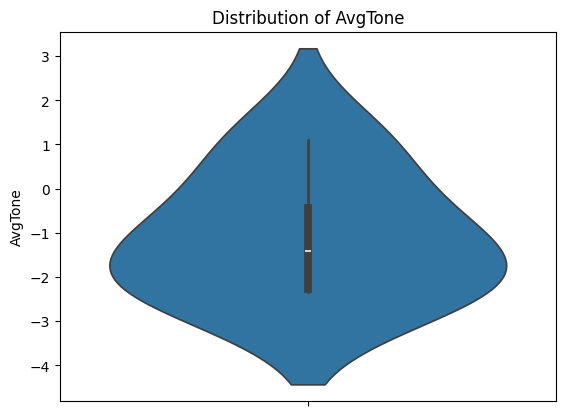

In [ ]:
sns.violinplot(y=df_merged1["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

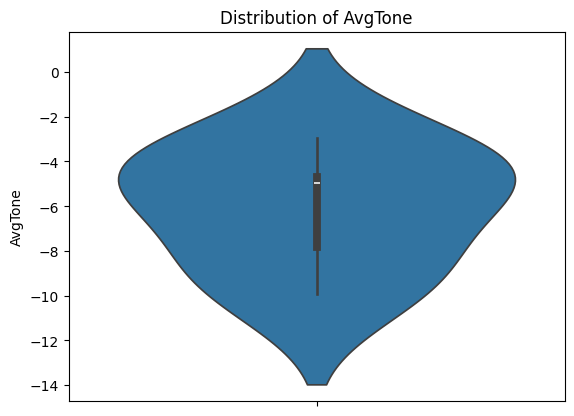

In [ ]:
sns.violinplot(y=df_merged2["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

### Распределба на AvgTone

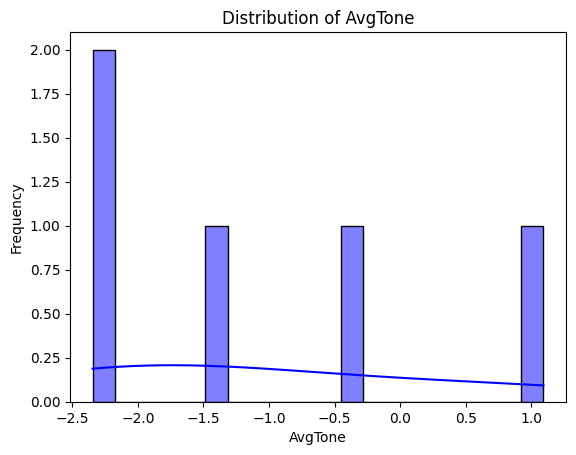

In [ ]:
sns.histplot(df_merged1["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()

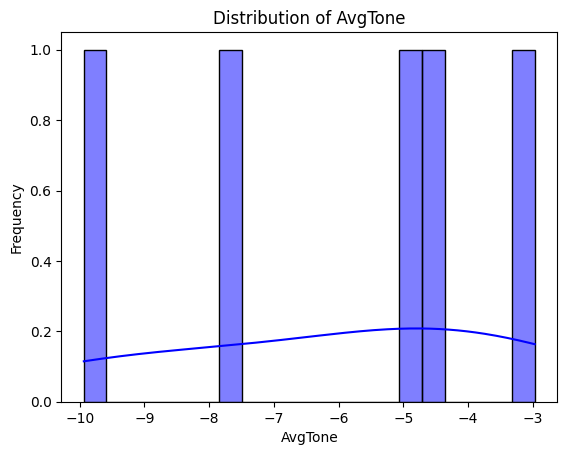

In [ ]:
sns.histplot(df_merged2["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()

In [ ]:
g = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/concatenated_data_Cleaned.csv')

### Приказ на AvgTone по квартали

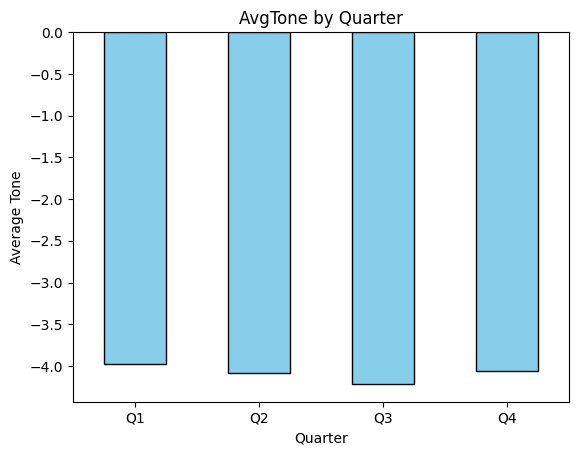

In [ ]:
g.groupby("Quarter")["AvgTone"].mean().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("AvgTone by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Tone")
plt.xticks(rotation=0)
plt.show()